### test analysis module

In [1]:
os.getcwd()
import pydrodelta.analysis 
import json
import matplotlib.pyplot as plt


#### instantiate boundarySet class from config file (.xml)

In [2]:
bordes_config = json.load(open("pydrodelta_config/288_short.json"))
bordes_set = pydrodelta.analysis.BoundarySet(bordes_config)
bordes_set

#### batch process

In [3]:
bordes_set.batchProcessInput()

Detecta Outliers:
Limite superior 5.0
Limite inferior -3.03
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 4.62
Limite inferior -2.25
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 4.18
Limite inferior -1.82
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 3.42
Limite inferior -1.7
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 2.66
Limite inferior -2.01
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 1000.0
Limite inferior 0.0
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 10000.0
Limite inferior 0.0
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 8.0
Limite inferior -1.5
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 8.0
Limite inferior -1.5
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 8.0
Limite inferior -1.5
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 4.18
Limite inferior -1.82
Cantidad de outliers:  0
Detecta Saltos:
Limite Salto (m):  0.835
Cantidad de Saltos 0

In [5]:
# df = bordes_set.boundaries[5].series[0].interpolated_from.origin_1.series[0].obs_df[["valor",]]
# df
bordes_set.boundaries[4].series[0].obs_df

,valor
timestart,
2022-05-01 00:00:00-03:00,1.600000
2022-05-01 01:00:00-03:00,1.570333
2022-05-01 02:00:00-03:00,1.452806
2022-05-01 03:00:00-03:00,1.345278
2022-05-01 04:00:00-03:00,1.247750
...,...
2022-05-31 20:00:00-03:00,1.092250
2022-05-31 21:00:00-03:00,1.194611
2022-05-31 22:00:00-03:00,1.324722


In [17]:
df.join(bordes_set.boundaries[5].series[0].interpolated_from.origin_2.series[0].obs_df[["valor",]],how='left',rsuffix='_other')


,valor,valorother_
timestart,,
2022-05-01 00:00:00-03:00,0.6300,0.6300
2022-05-01 01:00:00-03:00,0.7350,0.7350
2022-05-01 02:00:00-03:00,0.6150,0.6150
2022-05-01 03:00:00-03:00,0.5625,0.5625
2022-05-01 04:00:00-03:00,0.5675,0.5675
...,...,...
2022-05-31 20:00:00-03:00,0.8900,0.8900
2022-05-31 21:00:00-03:00,0.9575,0.9575
2022-05-31 22:00:00-03:00,0.9725,0.9725


#### load data

In [3]:
bordes_set.loadData()

In [4]:
print(len(bordes_set.boundaries))
for boundary in bordes_set.boundaries:
    print(len(boundary.series))
    for serie in boundary.series:
        print(len(serie.obs_df))

3
5
769
737
744
1489
744
2
31
0
3
31
31
744


### sanitize timeseries

In [5]:
bordes_set.removeOutliers()
bordes_set.detectJumps()

Detecta Outliers:
Limite superior 5.0
Limite inferior -3.03
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 4.62
Limite inferior -2.25
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 4.18
Limite inferior -1.82
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 3.42
Limite inferior -1.7
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 2.66
Limite inferior -2.01
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 1000.0
Limite inferior 0.0
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 10000.0
Limite inferior 0.0
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 8.0
Limite inferior -1.5
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 8.0
Limite inferior -1.5
Cantidad de outliers:  0
Detecta Outliers:
Limite superior 8.0
Limite inferior -1.5
Cantidad de outliers:  0
Detecta Saltos:
Limite Salto (m):  0.835
Cantidad de Saltos 0
Detecta Saltos:
Limite Salto (m):  0.958
Cantidad de Saltos 0
Detecta Saltos:
Limite 

False

In [6]:
bordes_set.regularize()
bordes_set.fillNulls()


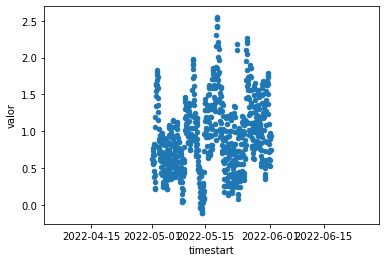

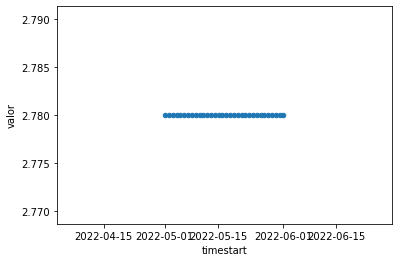

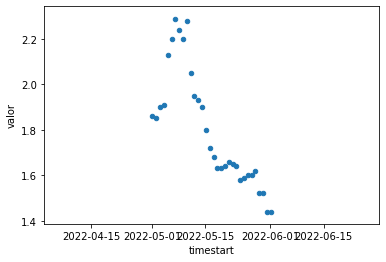

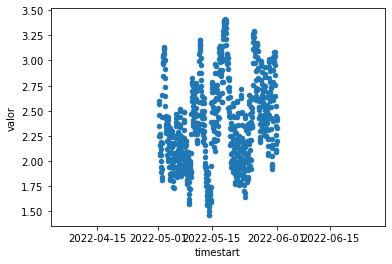

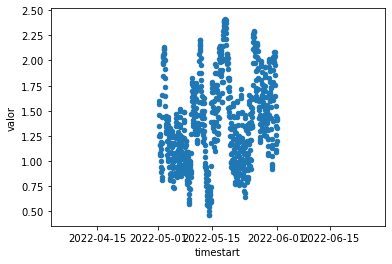

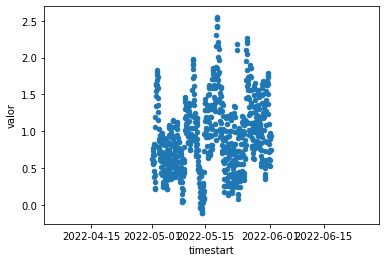

In [6]:
for borde in bordes_set.boundaries:
    df = borde.series[0].obs_df.reset_index() # .plot(y="valor")
    df.plot(kind="scatter",x="timestart",y="valor")
plt.show()

#### output to file (csv and json)

In [8]:
# csv = bordes_set.toCSV()
bordes_set.saveData("tmp/bordes_288_short.csv")
bordes_set.saveData("tmp/bordes_288_short.json","json")


#### upload to a5

In [ ]:
#upload all
bordes_set.uploadData()
# upload only one boundary
bordes_set.boundaries[2].uploadData()
